In [1]:
import os
import pathlib
import time

import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
TIME_POINTS_NUM = 800000
PERIOD = 0.02
TIME_STEP = PERIOD / TIME_POINTS_NUM
#time_vector = np.arange(0, PERIOD, TIME_STEP)
time_vector = np.linspace(0, 2 * np.pi, TIME_POINTS_NUM)

In [4]:
time_vector.shape

(800000,)

In [5]:
!ls ../input/

metadata_test.csv   sample_submission.csv  test.parquet.zip  train.parquet.zip
metadata_train.csv  test		   train


In [6]:
metadata_train_df = pd.read_csv('../input/metadata_train.csv')

In [7]:
metadata_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8712 entries, 0 to 8711
Data columns (total 4 columns):
signal_id         8712 non-null int64
id_measurement    8712 non-null int64
phase             8712 non-null int64
target            8712 non-null int64
dtypes: int64(4)
memory usage: 272.3 KB


In [8]:
metadata_train_df.describe()

,signal_id,id_measurement,phase,target
count,8712.000000,8712.000000,8712.000000,8712.000000
mean,4355.500000,1451.500000,1.000000,0.060262
std,2515.082106,838.360658,0.816543,0.237985
min,0.000000,0.000000,0.000000,0.000000
25%,2177.750000,725.750000,0.000000,0.000000
50%,4355.500000,1451.500000,1.000000,0.000000
75%,6533.250000,2177.250000,2.000000,0.000000
max,8711.000000,2903.000000,2.000000,1.000000


In [9]:
metadata_train_df.head()

,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1


In [10]:
metadata_train_df.tail()

,signal_id,id_measurement,phase,target
8707,8707,2902,1,0
8708,8708,2902,2,0
8709,8709,2903,0,0
8710,8710,2903,1,0
8711,8711,2903,2,0


In [11]:
#%%timeit
train_df = pq.read_pandas('../input/train/train.parquet').to_pandas()

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 8712 entries, 0 to 8711
dtypes: int8(8712)
memory usage: 6.5 GB


In [13]:
train_df.columns[:5]

Index(['0', '1', '2', '3', '4'], dtype='object')

In [14]:
subset_train_df = pq.read_pandas('../input/train/train.parquet', columns=[str(i) for i in range(5)]).to_pandas()

In [15]:
subset_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 5 columns):
0    800000 non-null int8
1    800000 non-null int8
2    800000 non-null int8
3    800000 non-null int8
4    800000 non-null int8
dtypes: int8(5)
memory usage: 3.8 MB


In [16]:
subset_train_df.head()

,0,1,2,3,4
0,18,1,-19,-16,-5
1,18,0,-19,-17,-6
2,17,-1,-20,-17,-6
3,18,1,-19,-16,-5
4,18,0,-19,-16,-5


In [17]:
metadata_train_df.signal_id.unique().shape

(8712,)

In [18]:
metadata_train_df.id_measurement.unique().shape

(2904,)

In [19]:
metadata_train_df.signal_id.unique().shape[0] == 3 * metadata_train_df.id_measurement.unique().shape[0]

True

Первая идея, с которой всё началось - взять идеальную синусойду (которая и описывает значение амплитуды в зависимости от фазы). Далее сразу же встал вопрос - а где взять амплитудный коэффицент для идеальной синусойды? Ответ очевиден: вычислить её как sample mean. Ну или sample median (mode) и.т. - среднее геометрическое, гармоническое и что там ещё. Причём и взять и от всех сигналов, и только от "неаварийных" и только от "аварийных". Далее мы можем вычислять разности в каждой  "измерительной" точке между "идеальной" амплитудой и "реальной". А далее можно считать квадратичные отклонения, складывать их, или абсолютные отклонения, складывать их. Если же окажеться что амплитуды силно разняться (разные энергии переносяться по различным линиям электропередач), то возможно надо  поприводить их всех к однинаковому масштабу (MinMaxScaler и т.д.), либо же разбивать на какието бины. Если возможно, то найти count различных значений амплитуд для каждого сигнала (или груп сигналов - например "аварийных" и "неаварийных" или ещё каких либо групп, например бинов по максимальным/минимальным значениям), построить гистограммы. А так же построить гистограммы средних/медиан/мод для всех сигналов (либо их бинов). Т.е. найти средние (медиану, моду) для каждого сигнала, и построить гистограммы для этих значений. Найти так же дисперсии/среднеквадратичные отклонения/квантили для всех вышеперичисленных категорий сигналов, например отдельно для "аварийных" и "неаварийных") вдруг они как раз статистически значимы.

In [20]:
train_df.columns[:5]

Index(['0', '1', '2', '3', '4'], dtype='object')

In [21]:
one_signal_0 = train_df.iloc[0, :]

In [22]:
one_signal_0.shape

(8712,)

In [23]:
one_signal_0 = train_df.iloc[:, 0]

In [24]:
one_signal_0.shape

(800000,)

In [25]:
type(one_signal_0)

pandas.core.series.Series

In [26]:
time_points = np.arange?

In [ ]:
time_points = np.arange

In [27]:
time_points = np.arange(TIME_POINTS_NUM)

In [28]:
time_points.shape

(800000,)

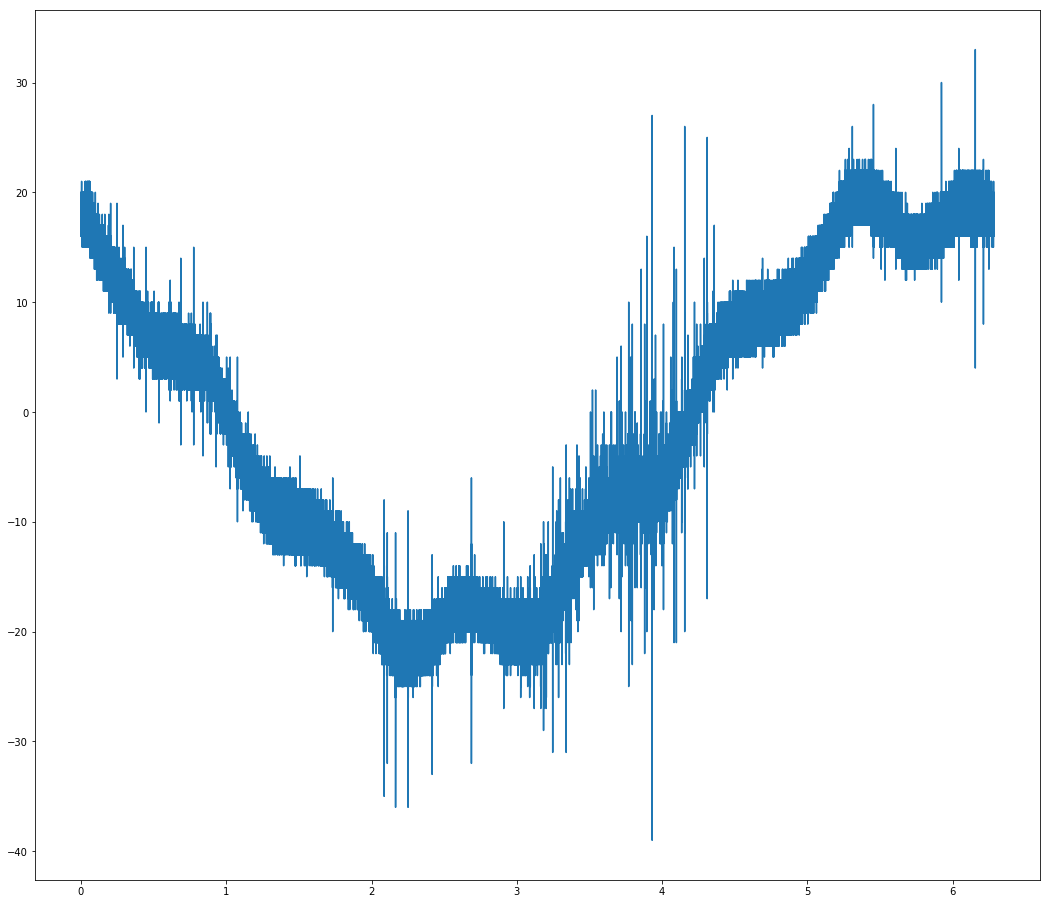

In [29]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
ax.plot(time_vector, one_signal_0)

In [30]:
one_signal_1 = train_df.iloc[:, 1]

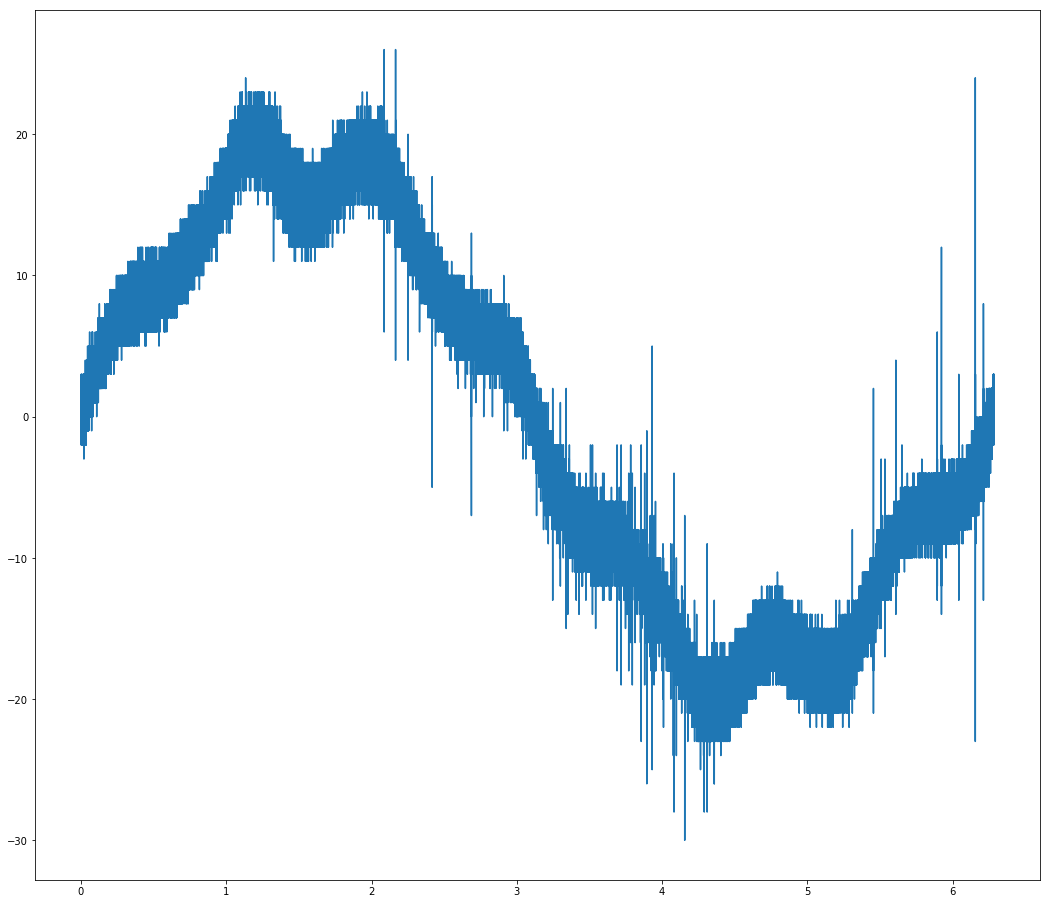

In [31]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
ax.plot(time_vector, one_signal_1)

In [32]:
one_signal_0_abs = one_signal_0.map(np.abs)

In [33]:
one_signal_0_mean_amplitude = one_signal_0_abs.sum() / one_signal_0.shape[0]
one_signal_0_max_amplitude = one_signal_0_abs.max()
one_signal_0_min_amplitude = one_signal_0_abs.min()
one_signal_0_mode_amplitude = one_signal_0_abs.mode().iloc[0]
one_signal_0_median_amplitude = one_signal_0_abs.median()

In [34]:
#one_signal_0_abs.mode?

In [35]:
print(one_signal_0_mean_amplitude)
print(one_signal_0_min_amplitude)
print(one_signal_0_max_amplitude)
print(one_signal_0_mode_amplitude)
print(one_signal_0_median_amplitude)

12.57544875
0
39
19
13.0


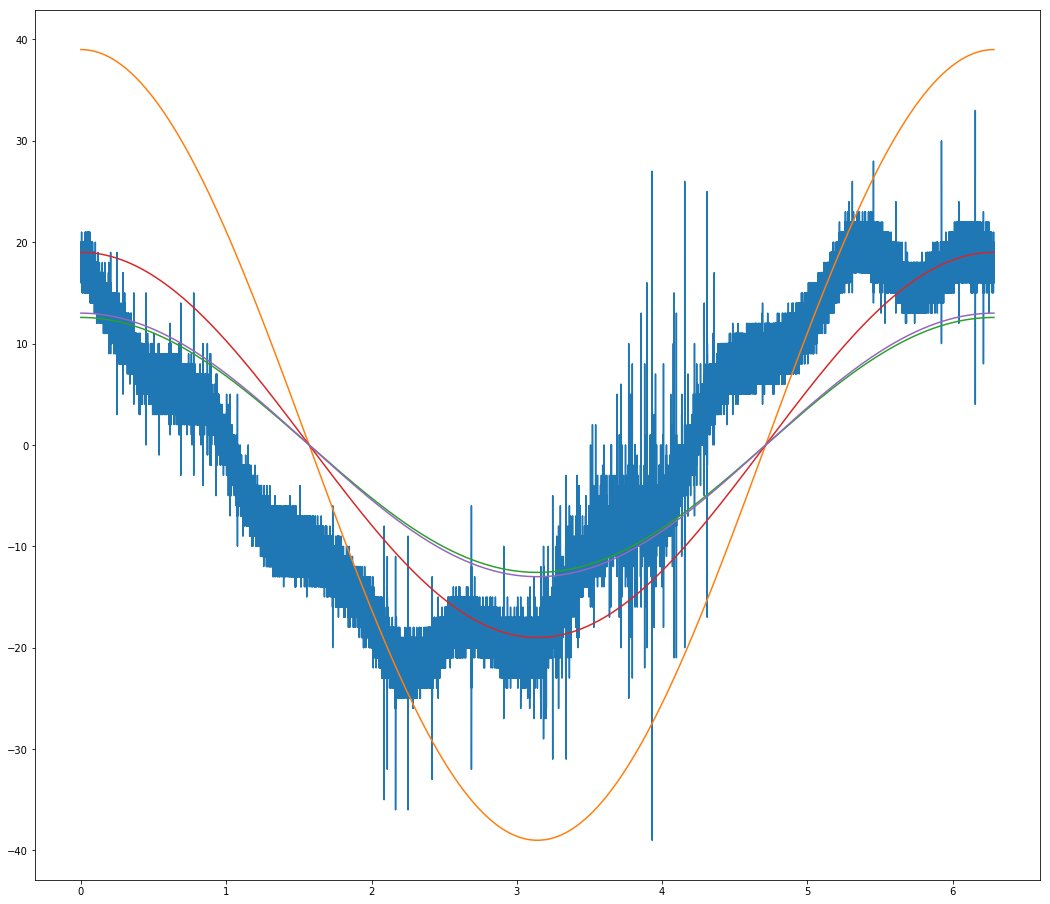

In [36]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
#ax.plot(time_points, one_signal_0)
#ax.plot(time_points, one_signal_0_max_amplitude * np.cos(time_vector))
#ax.plot(time_points, one_signal_0_mean_amplitude * np.cos(time_vector))
#ax.plot(time_points, one_signal_0_mode_amplitude * np.cos(time_vector))

ax.plot(time_vector, one_signal_0)
ax.plot(time_vector, one_signal_0_max_amplitude * np.cos(time_vector))
ax.plot(time_vector, one_signal_0_mean_amplitude * np.cos(time_vector))
ax.plot(time_vector, one_signal_0_mode_amplitude * np.cos(time_vector))
ax.plot(time_vector, one_signal_0_median_amplitude * np.cos(time_vector))

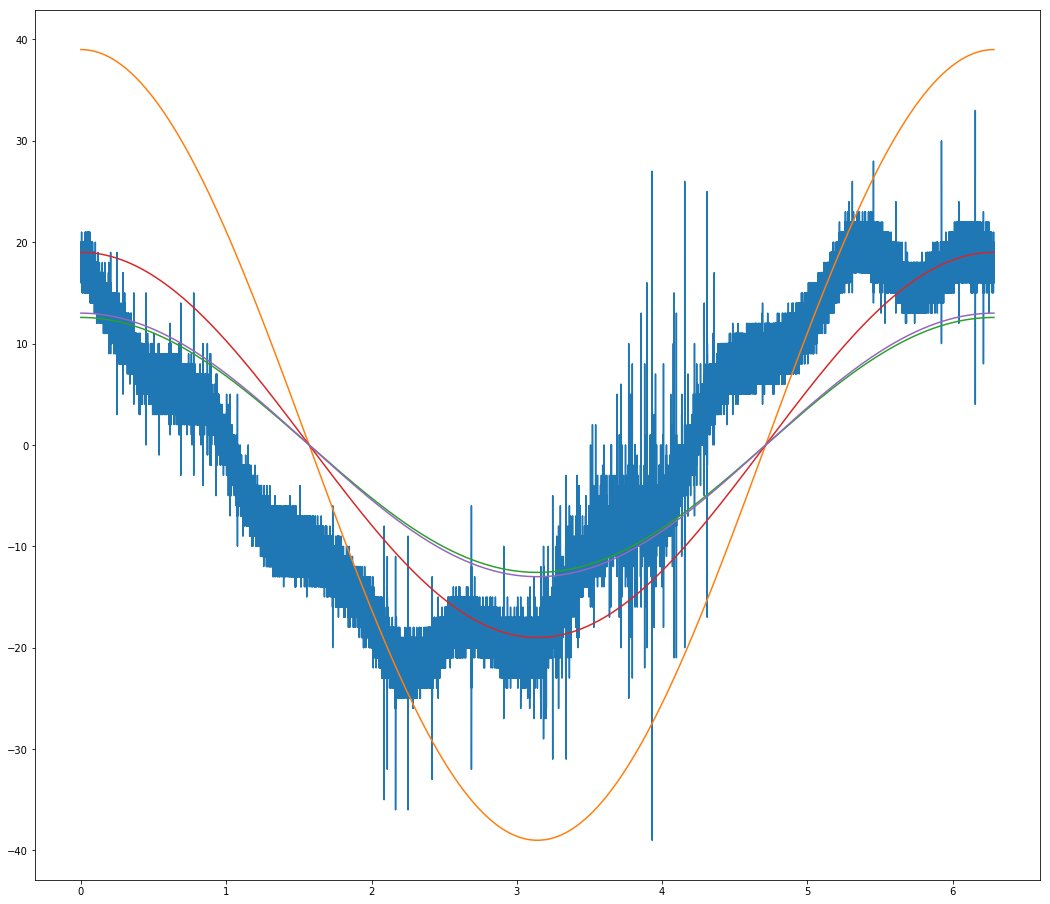

In [37]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
#ax.plot(time_points, one_signal_0)
#ax.plot(time_points, one_signal_0_max_amplitude * np.cos(time_vector))
#ax.plot(time_points, one_signal_0_mean_amplitude * np.cos(time_vector))
#ax.plot(time_points, one_signal_0_mode_amplitude * np.cos(time_vector))
time_vector_0 = time_vector + np.pi / 2
ax.plot(time_vector, one_signal_0)
ax.plot(time_vector, one_signal_0_max_amplitude * np.sin(time_vector_0))
ax.plot(time_vector, one_signal_0_mean_amplitude * np.sin(time_vector_0))
ax.plot(time_vector, one_signal_0_mode_amplitude * np.sin(time_vector_0))
ax.plot(time_vector, one_signal_0_median_amplitude * np.sin(time_vector_0))

In [38]:
#np.sin?

In [39]:
one_signal_1_abs = one_signal_1.map(np.abs)

In [40]:
one_signal_1_mean_amplitude = one_signal_1_abs.sum() / one_signal_1.shape[0]
one_signal_1_max_amplitude = one_signal_1_abs.max()
one_signal_1_min_amplitude = one_signal_1_abs.min()
one_signal_1_mode_amplitude = one_signal_1_abs.mode().iloc[0]
one_signal_1_median_amplitude = one_signal_1_abs.median()

In [41]:
print(one_signal_1_mean_amplitude)
print(one_signal_1_min_amplitude)
print(one_signal_1_max_amplitude)
print(one_signal_1_mode_amplitude)
print(one_signal_1_median_amplitude)

11.7918075
0
30
17
12.0


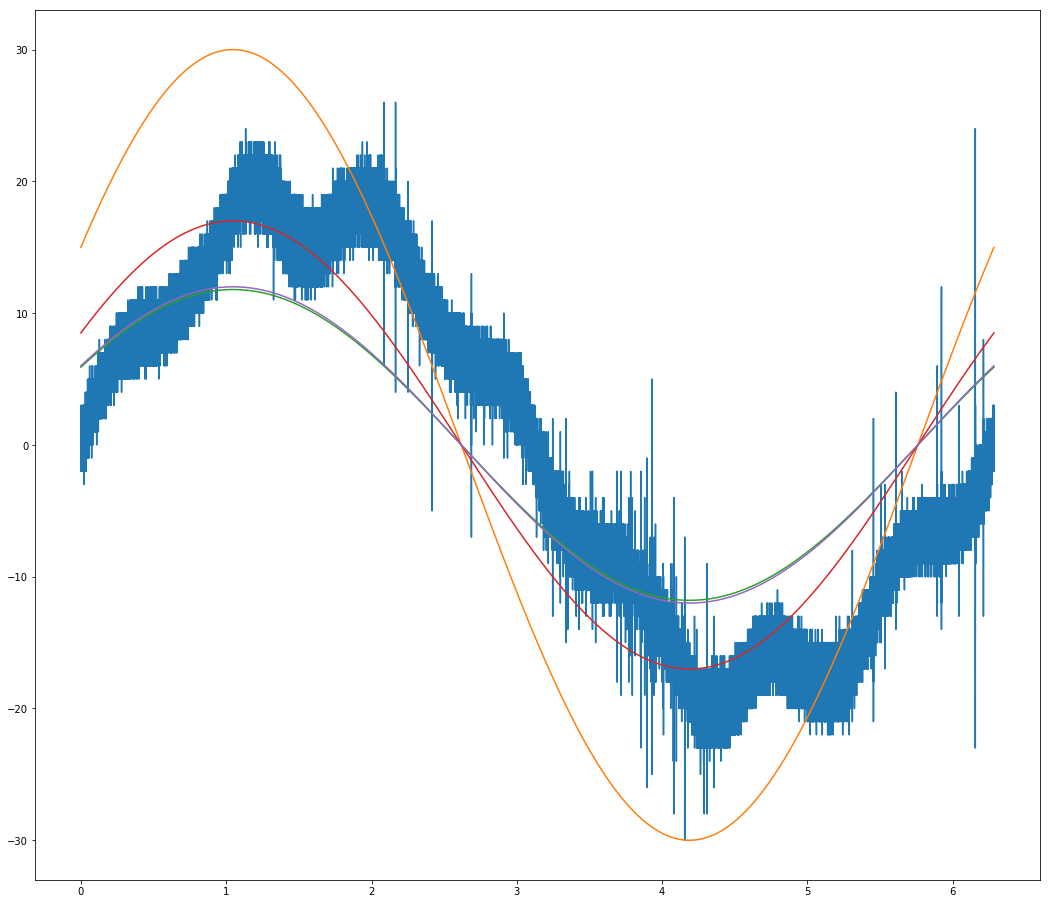

In [90]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
#ax.plot(time_points, one_signal_1)
#ax.plot(time_points, one_signal_1_max_amplitude * np.cos(time_vector + 2 * np.pi / 3))
#ax.plot(time_points, one_signal_1_mean_amplitude * np.cos(time_vector + 2 * np.pi / 3))
#ax.plot(time_points, one_signal_1_max_amplitude * np.sin(time_vector))
#ax.plot(time_points, one_signal_1_mean_amplitude * np.sin(time_vector))
#ax.plot(time_points, one_signal_1_mode_amplitude * np.sin(time_vector))

time_vector_1 = time_vector - np.pi / 2 + 2 * np.pi / 3
ax.plot(time_vector, one_signal_1)
#ax.plot(time_points, one_signal_1_max_amplitude * np.cos(time_vector + 2 * np.pi / 3))
#ax.plot(time_points, one_signal_1_mean_amplitude * np.cos(time_vector + 2 * np.pi / 3))
ax.plot(time_vector, one_signal_1_max_amplitude * np.sin(time_vector_1))
ax.plot(time_vector, one_signal_1_mean_amplitude * np.sin(time_vector_1))
ax.plot(time_vector, one_signal_1_mode_amplitude * np.sin(time_vector_1))
ax.plot(time_vector, one_signal_1_median_amplitude * np.sin(time_vector_1))
#time_vector_1 = time_vector + np.pi / 3
#ax.plot(time_vector, one_signal_1_max_amplitude * np.cos(time_vector_1))
#ax.plot(time_vector, one_signal_1_mean_amplitude * np.cos(time_vector_1))
#ax.plot(time_vector, one_signal_1_mode_amplitude * np.cos(time_vector_1))
#ax.plot(time_vector, one_signal_1_median_amplitude * np.cos(time_vector_1))
#ax.plot(time_vector, one_signal_1_max_amplitude * np.cos(time_vector))
#ax.plot(time_vector, one_signal_1_mean_amplitude * np.cos(time_vector))
#ax.plot(time_vector, one_signal_1_mode_amplitude * np.cos(time_vector))

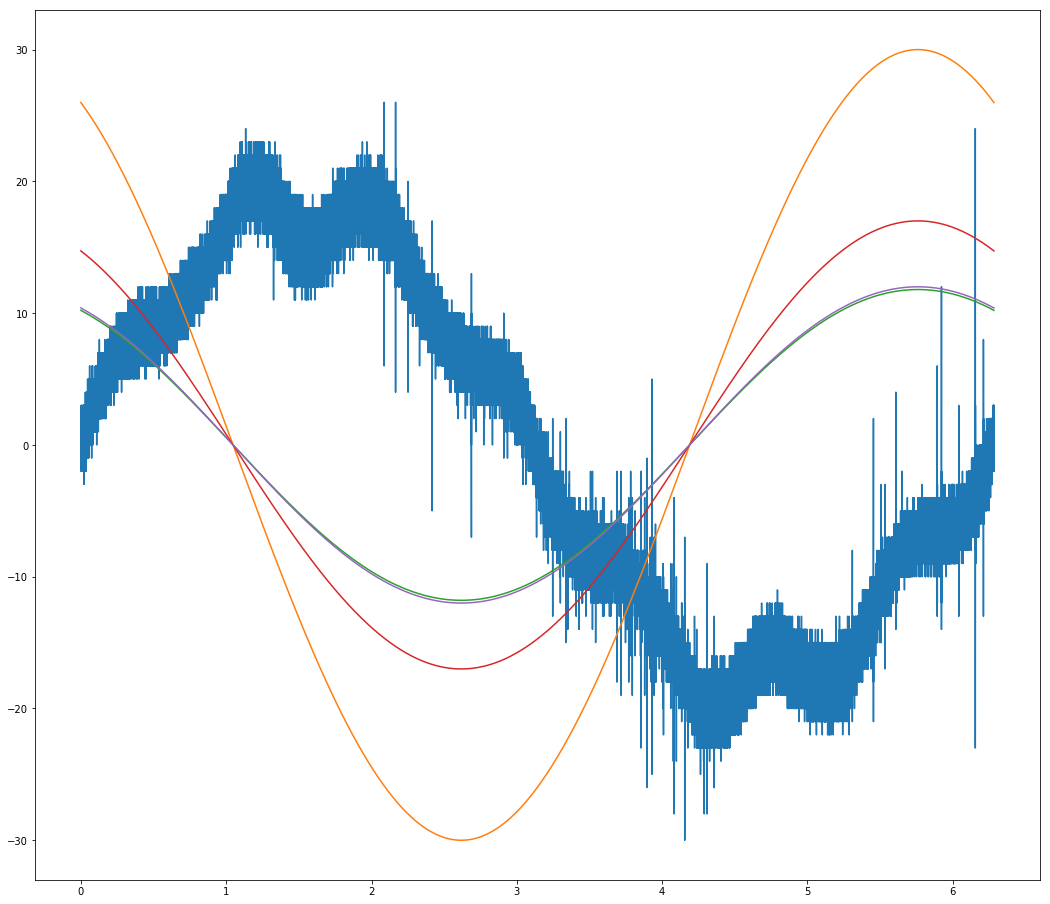

In [43]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
#ax.plot(time_points, one_signal_1)
#ax.plot(time_points, one_signal_1_max_amplitude * np.cos(time_vector + 2 * np.pi / 3))
#ax.plot(time_points, one_signal_1_mean_amplitude * np.cos(time_vector + 2 * np.pi / 3))
#ax.plot(time_points, one_signal_1_max_amplitude * np.sin(time_vector))
#ax.plot(time_points, one_signal_1_mean_amplitude * np.sin(time_vector))
#ax.plot(time_points, one_signal_1_mode_amplitude * np.sin(time_vector))

ax.plot(time_vector, one_signal_1)
#ax.plot(time_points, one_signal_1_max_amplitude * np.cos(time_vector + 2 * np.pi / 3))
#ax.plot(time_points, one_signal_1_mean_amplitude * np.cos(time_vector + 2 * np.pi / 3))
##ax.plot(time_vector, one_signal_1_max_amplitude * np.sin(time_vector))
##ax.plot(time_vector, one_signal_1_mean_amplitude * np.sin(time_vector))
##ax.plot(time_vector, one_signal_1_mode_amplitude * np.sin(time_vector))
##ax.plot(time_vector, one_signal_1_median_amplitude * np.sin(time_vector))
time_vector_1 = time_vector + 2 * np.pi / 3
ax.plot(time_vector, one_signal_1_max_amplitude * np.sin(time_vector_1))
ax.plot(time_vector, one_signal_1_mean_amplitude * np.sin(time_vector_1))
ax.plot(time_vector, one_signal_1_mode_amplitude * np.sin(time_vector_1))
ax.plot(time_vector, one_signal_1_median_amplitude * np.sin(time_vector_1))
#ax.plot(time_vector, one_signal_1_max_amplitude * np.cos(time_vector))
#ax.plot(time_vector, one_signal_1_mean_amplitude * np.cos(time_vector))
#ax.plot(time_vector, one_signal_1_mode_amplitude * np.cos(time_vector))

In [44]:
train_signals_df_mode = train_df.mode()

In [45]:
print(train_signals_df_mode)

      0     1     2     3     4     5     6     7     8     9  ...   8702  \
0  18.0 -17.0 -18.0 -19.0 -17.0 -18.0  18.0 -23.0 -20.0  20.0  ...  -19.0   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   

   8703  8704  8705  8706  8707  8708  8709  8710  8711  
0  18.0  19.0 -20.0 -20.0  16.0  18.0  18.0  19.0 -20.0  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[2 rows x 8712 columns]


In [46]:
one_signal_0_abs.median()

13.0

In [47]:
one_signal_0_abs.unique().shape

(37,)

In [48]:
one_signal_1_abs.unique().shape

(30,)

In [49]:
one_signal_0.unique().shape

(66,)

In [50]:
one_signal_1.unique().shape

(55,)

In [51]:
#train_df_abs = train_df.applymap(np.abs)

In [52]:
one_signal_2 = train_df.iloc[:, 2]

In [53]:
one_signal_2 > 0

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
799970    False
799971    False
799972    False
799973    False
799974    False
799975    False
799976    False
799977    False
799978    False
799979    False
799980    False
799981    False
799982    False
799983    False
799984    False
799985    False
799986    False
799987    False
799988    False
799989    False
799990    False
799991    False
799992    False
799993    False
799994    False
799995    False
799996    False
799997    False
799998    False
799999    False
Name: 2, Length: 800000,

In [54]:
one_signal_2_negatives = one_signal_2[one_signal_2 <= 0]

In [55]:
one_signal_2_negatives.shape

(404711,)

In [56]:
#%%timeit
one_signal_2_abs = one_signal_2.map(np.abs)

In [57]:
%%timeit
one_signal_2_abs = one_signal_2[one_signal_2 >= 0]
one_signal_2_abs = one_signal_2[one_signal_2 < 0]

3.67 ms ± 72.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [58]:
one_signal_2_abs.shape

(800000,)

In [59]:
one_signal_2

0        -19
1        -19
2        -20
3        -19
4        -19
5        -20
6        -18
7        -19
8        -20
9        -19
10       -19
11       -19
12       -19
13       -19
14       -18
15       -20
16       -19
17       -19
18       -19
19       -18
20       -19
21       -20
22       -19
23       -20
24       -19
25       -18
26       -19
27       -19
28       -19
29       -20
          ..
799970   -20
799971   -20
799972   -19
799973   -20
799974   -20
799975   -19
799976   -19
799977   -18
799978   -20
799979   -20
799980   -20
799981   -20
799982   -18
799983   -20
799984   -19
799985   -19
799986   -20
799987   -19
799988   -18
799989   -18
799990   -19
799991   -20
799992   -21
799993   -18
799994   -19
799995   -18
799996   -19
799997   -19
799998   -18
799999   -19
Name: 2, Length: 800000, dtype: int8

In [60]:
one_signal_2_abs

0         19
1         19
2         20
3         19
4         19
5         20
6         18
7         19
8         20
9         19
10        19
11        19
12        19
13        19
14        18
15        20
16        19
17        19
18        19
19        18
20        19
21        20
22        19
23        20
24        19
25        18
26        19
27        19
28        19
29        20
          ..
799970    20
799971    20
799972    19
799973    20
799974    20
799975    19
799976    19
799977    18
799978    20
799979    20
799980    20
799981    20
799982    18
799983    20
799984    19
799985    19
799986    20
799987    19
799988    18
799989    18
799990    19
799991    20
799992    21
799993    18
799994    19
799995    18
799996    19
799997    19
799998    18
799999    19
Name: 2, Length: 800000, dtype: int64

In [61]:
one_signal_2_mean_amplitude = one_signal_2_abs.sum() / one_signal_2.shape[0]
one_signal_2_max_amplitude = one_signal_2_abs.max()
one_signal_2_min_amplitude = one_signal_2_abs.min()
one_signal_2_mode_amplitude = one_signal_2_abs.mode().iloc[0]
one_signal_2_median_amplitude = one_signal_2_abs.median()

In [62]:
print(one_signal_2_mean_amplitude)
print(one_signal_2_min_amplitude)
print(one_signal_2_max_amplitude)
print(one_signal_2_mode_amplitude)
print(one_signal_2_median_amplitude)

12.353285
0
39
18
13.0


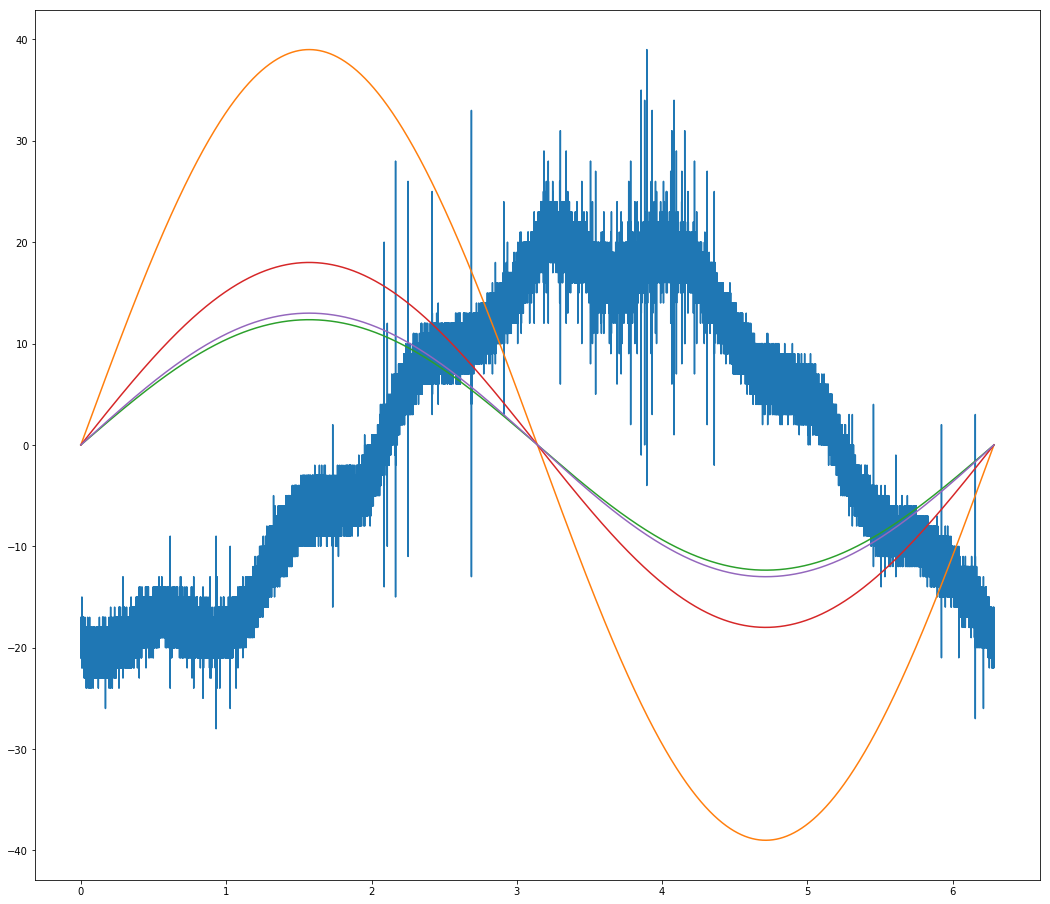

In [63]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
#ax.plot(time_points, one_signal_1)
#ax.plot(time_points, one_signal_1_max_amplitude * np.cos(time_vector + 2 * np.pi / 3))
#ax.plot(time_points, one_signal_1_mean_amplitude * np.cos(time_vector + 2 * np.pi / 3))
#ax.plot(time_points, one_signal_1_max_amplitude * np.sin(time_vector))
#ax.plot(time_points, one_signal_1_mean_amplitude * np.sin(time_vector))
#ax.plot(time_points, one_signal_1_mode_amplitude * np.sin(time_vector))

ax.plot(time_vector, one_signal_2)
#ax.plot(time_points, one_signal_1_max_amplitude * np.cos(time_vector + 2 * np.pi / 3))
#ax.plot(time_points, one_signal_1_mean_amplitude * np.cos(time_vector + 2 * np.pi / 3))
ax.plot(time_vector, one_signal_2_max_amplitude * np.sin(time_vector))
ax.plot(time_vector, one_signal_2_mean_amplitude * np.sin(time_vector))
ax.plot(time_vector, one_signal_2_mode_amplitude * np.sin(time_vector))
ax.plot(time_vector, one_signal_2_median_amplitude * np.sin(time_vector))

#ax.plot(time_vector, one_signal_1_max_amplitude * np.cos(time_vector))
#ax.plot(time_vector, one_signal_1_mean_amplitude * np.cos(time_vector))
#ax.plot(time_vector, one_signal_1_mode_amplitude * np.cos(time_vector))

In [64]:
grouped_by_id_measurement = metadata_train_df.groupby('id_measurement')

In [65]:
for item in grouped_by_id_measurement:
    print(item)

(0,    signal_id  id_measurement  phase  target
0          0               0      0       0
1          1               0      1       0
2          2               0      2       0)
(1,    signal_id  id_measurement  phase  target
3          3               1      0       1
4          4               1      1       1
5          5               1      2       1)
(2,    signal_id  id_measurement  phase  target
6          6               2      0       0
7          7               2      1       0
8          8               2      2       0)
(3,     signal_id  id_measurement  phase  target
9           9               3      0       0
10         10               3      1       0
11         11               3      2       0)
(4,     signal_id  id_measurement  phase  target
12         12               4      0       0
13         13               4      1       0
14         14               4      2       0)
(5,     signal_id  id_measurement  phase  target
15         15               5      0  

(74,      signal_id  id_measurement  phase  target
222        222              74      0       0
223        223              74      1       0
224        224              74      2       0)
(75,      signal_id  id_measurement  phase  target
225        225              75      0       0
226        226              75      1       0
227        227              75      2       0)
(76,      signal_id  id_measurement  phase  target
228        228              76      0       1
229        229              76      1       1
230        230              76      2       1)
(77,      signal_id  id_measurement  phase  target
231        231              77      0       0
232        232              77      1       0
233        233              77      2       0)
(78,      signal_id  id_measurement  phase  target
234        234              78      0       0
235        235              78      1       0
236        236              78      2       0)
(79,      signal_id  id_measurement  phase  target

(147,      signal_id  id_measurement  phase  target
441        441             147      0       0
442        442             147      1       0
443        443             147      2       0)
(148,      signal_id  id_measurement  phase  target
444        444             148      0       0
445        445             148      1       0
446        446             148      2       0)
(149,      signal_id  id_measurement  phase  target
447        447             149      0       0
448        448             149      1       0
449        449             149      2       0)
(150,      signal_id  id_measurement  phase  target
450        450             150      0       0
451        451             150      1       0
452        452             150      2       0)
(151,      signal_id  id_measurement  phase  target
453        453             151      0       0
454        454             151      1       0
455        455             151      2       0)
(152,      signal_id  id_measurement  phase  

(207,      signal_id  id_measurement  phase  target
621        621             207      0       0
622        622             207      1       0
623        623             207      2       0)
(208,      signal_id  id_measurement  phase  target
624        624             208      0       0
625        625             208      1       0
626        626             208      2       0)
(209,      signal_id  id_measurement  phase  target
627        627             209      0       0
628        628             209      1       0
629        629             209      2       0)
(210,      signal_id  id_measurement  phase  target
630        630             210      0       0
631        631             210      1       0
632        632             210      2       0)
(211,      signal_id  id_measurement  phase  target
633        633             211      0       0
634        634             211      1       0
635        635             211      2       0)
(212,      signal_id  id_measurement  phase  

(284,      signal_id  id_measurement  phase  target
852        852             284      0       0
853        853             284      1       0
854        854             284      2       0)
(285,      signal_id  id_measurement  phase  target
855        855             285      0       0
856        856             285      1       0
857        857             285      2       0)
(286,      signal_id  id_measurement  phase  target
858        858             286      0       0
859        859             286      1       0
860        860             286      2       0)
(287,      signal_id  id_measurement  phase  target
861        861             287      0       0
862        862             287      1       0
863        863             287      2       0)
(288,      signal_id  id_measurement  phase  target
864        864             288      0       0
865        865             288      1       0
866        866             288      2       0)
(289,      signal_id  id_measurement  phase  

(359,       signal_id  id_measurement  phase  target
1077       1077             359      0       0
1078       1078             359      1       0
1079       1079             359      2       0)
(360,       signal_id  id_measurement  phase  target
1080       1080             360      0       0
1081       1081             360      1       0
1082       1082             360      2       0)
(361,       signal_id  id_measurement  phase  target
1083       1083             361      0       1
1084       1084             361      1       1
1085       1085             361      2       1)
(362,       signal_id  id_measurement  phase  target
1086       1086             362      0       0
1087       1087             362      1       0
1088       1088             362      2       0)
(363,       signal_id  id_measurement  phase  target
1089       1089             363      0       0
1090       1090             363      1       0
1091       1091             363      2       0)
(364,       signal_id  id

(433,       signal_id  id_measurement  phase  target
1299       1299             433      0       0
1300       1300             433      1       0
1301       1301             433      2       0)
(434,       signal_id  id_measurement  phase  target
1302       1302             434      0       0
1303       1303             434      1       0
1304       1304             434      2       0)
(435,       signal_id  id_measurement  phase  target
1305       1305             435      0       0
1306       1306             435      1       0
1307       1307             435      2       0)
(436,       signal_id  id_measurement  phase  target
1308       1308             436      0       0
1309       1309             436      1       0
1310       1310             436      2       0)
(437,       signal_id  id_measurement  phase  target
1311       1311             437      0       0
1312       1312             437      1       0
1313       1313             437      2       0)
(438,       signal_id  id

(508,       signal_id  id_measurement  phase  target
1524       1524             508      0       0
1525       1525             508      1       0
1526       1526             508      2       0)
(509,       signal_id  id_measurement  phase  target
1527       1527             509      0       0
1528       1528             509      1       0
1529       1529             509      2       0)
(510,       signal_id  id_measurement  phase  target
1530       1530             510      0       0
1531       1531             510      1       0
1532       1532             510      2       0)
(511,       signal_id  id_measurement  phase  target
1533       1533             511      0       0
1534       1534             511      1       0
1535       1535             511      2       0)
(512,       signal_id  id_measurement  phase  target
1536       1536             512      0       0
1537       1537             512      1       0
1538       1538             512      2       0)
(513,       signal_id  id

(569,       signal_id  id_measurement  phase  target
1707       1707             569      0       0
1708       1708             569      1       0
1709       1709             569      2       0)
(570,       signal_id  id_measurement  phase  target
1710       1710             570      0       0
1711       1711             570      1       0
1712       1712             570      2       0)
(571,       signal_id  id_measurement  phase  target
1713       1713             571      0       0
1714       1714             571      1       0
1715       1715             571      2       0)
(572,       signal_id  id_measurement  phase  target
1716       1716             572      0       0
1717       1717             572      1       0
1718       1718             572      2       0)
(573,       signal_id  id_measurement  phase  target
1719       1719             573      0       0
1720       1720             573      1       0
1721       1721             573      2       0)
(574,       signal_id  id

(647,       signal_id  id_measurement  phase  target
1941       1941             647      0       0
1942       1942             647      1       0
1943       1943             647      2       0)
(648,       signal_id  id_measurement  phase  target
1944       1944             648      0       0
1945       1945             648      1       0
1946       1946             648      2       0)
(649,       signal_id  id_measurement  phase  target
1947       1947             649      0       0
1948       1948             649      1       0
1949       1949             649      2       0)
(650,       signal_id  id_measurement  phase  target
1950       1950             650      0       0
1951       1951             650      1       0
1952       1952             650      2       0)
(651,       signal_id  id_measurement  phase  target
1953       1953             651      0       0
1954       1954             651      1       0
1955       1955             651      2       0)
(652,       signal_id  id

(725,       signal_id  id_measurement  phase  target
2175       2175             725      0       0
2176       2176             725      1       0
2177       2177             725      2       0)
(726,       signal_id  id_measurement  phase  target
2178       2178             726      0       0
2179       2179             726      1       0
2180       2180             726      2       0)
(727,       signal_id  id_measurement  phase  target
2181       2181             727      0       0
2182       2182             727      1       0
2183       2183             727      2       0)
(728,       signal_id  id_measurement  phase  target
2184       2184             728      0       0
2185       2185             728      1       0
2186       2186             728      2       0)
(729,       signal_id  id_measurement  phase  target
2187       2187             729      0       0
2188       2188             729      1       0
2189       2189             729      2       0)
(730,       signal_id  id

(803,       signal_id  id_measurement  phase  target
2409       2409             803      0       0
2410       2410             803      1       0
2411       2411             803      2       0)
(804,       signal_id  id_measurement  phase  target
2412       2412             804      0       0
2413       2413             804      1       0
2414       2414             804      2       0)
(805,       signal_id  id_measurement  phase  target
2415       2415             805      0       0
2416       2416             805      1       0
2417       2417             805      2       0)
(806,       signal_id  id_measurement  phase  target
2418       2418             806      0       1
2419       2419             806      1       1
2420       2420             806      2       1)
(807,       signal_id  id_measurement  phase  target
2421       2421             807      0       0
2422       2422             807      1       0
2423       2423             807      2       0)
(808,       signal_id  id

(873,       signal_id  id_measurement  phase  target
2619       2619             873      0       0
2620       2620             873      1       0
2621       2621             873      2       0)
(874,       signal_id  id_measurement  phase  target
2622       2622             874      0       0
2623       2623             874      1       0
2624       2624             874      2       0)
(875,       signal_id  id_measurement  phase  target
2625       2625             875      0       0
2626       2626             875      1       0
2627       2627             875      2       0)
(876,       signal_id  id_measurement  phase  target
2628       2628             876      0       1
2629       2629             876      1       1
2630       2630             876      2       1)
(877,       signal_id  id_measurement  phase  target
2631       2631             877      0       0
2632       2632             877      1       0
2633       2633             877      2       0)
(878,       signal_id  id

(947,       signal_id  id_measurement  phase  target
2841       2841             947      0       0
2842       2842             947      1       0
2843       2843             947      2       0)
(948,       signal_id  id_measurement  phase  target
2844       2844             948      0       0
2845       2845             948      1       0
2846       2846             948      2       0)
(949,       signal_id  id_measurement  phase  target
2847       2847             949      0       0
2848       2848             949      1       0
2849       2849             949      2       0)
(950,       signal_id  id_measurement  phase  target
2850       2850             950      0       0
2851       2851             950      1       0
2852       2852             950      2       0)
(951,       signal_id  id_measurement  phase  target
2853       2853             951      0       0
2854       2854             951      1       0
2855       2855             951      2       0)
(952,       signal_id  id

(1024,       signal_id  id_measurement  phase  target
3072       3072            1024      0       0
3073       3073            1024      1       0
3074       3074            1024      2       0)
(1025,       signal_id  id_measurement  phase  target
3075       3075            1025      0       0
3076       3076            1025      1       0
3077       3077            1025      2       0)
(1026,       signal_id  id_measurement  phase  target
3078       3078            1026      0       0
3079       3079            1026      1       0
3080       3080            1026      2       0)
(1027,       signal_id  id_measurement  phase  target
3081       3081            1027      0       0
3082       3082            1027      1       0
3083       3083            1027      2       0)
(1028,       signal_id  id_measurement  phase  target
3084       3084            1028      0       0
3085       3085            1028      1       0
3086       3086            1028      2       0)
(1029,       signal_

(1097,       signal_id  id_measurement  phase  target
3291       3291            1097      0       0
3292       3292            1097      1       0
3293       3293            1097      2       0)
(1098,       signal_id  id_measurement  phase  target
3294       3294            1098      0       0
3295       3295            1098      1       0
3296       3296            1098      2       0)
(1099,       signal_id  id_measurement  phase  target
3297       3297            1099      0       0
3298       3298            1099      1       0
3299       3299            1099      2       0)
(1100,       signal_id  id_measurement  phase  target
3300       3300            1100      0       0
3301       3301            1100      1       0
3302       3302            1100      2       0)
(1101,       signal_id  id_measurement  phase  target
3303       3303            1101      0       0
3304       3304            1101      1       0
3305       3305            1101      2       0)
(1102,       signal_

(1176,       signal_id  id_measurement  phase  target
3528       3528            1176      0       0
3529       3529            1176      1       0
3530       3530            1176      2       0)
(1177,       signal_id  id_measurement  phase  target
3531       3531            1177      0       0
3532       3532            1177      1       0
3533       3533            1177      2       0)
(1178,       signal_id  id_measurement  phase  target
3534       3534            1178      0       1
3535       3535            1178      1       1
3536       3536            1178      2       1)
(1179,       signal_id  id_measurement  phase  target
3537       3537            1179      0       0
3538       3538            1179      1       0
3539       3539            1179      2       0)
(1180,       signal_id  id_measurement  phase  target
3540       3540            1180      0       0
3541       3541            1180      1       0
3542       3542            1180      2       0)
(1181,       signal_

(1250,       signal_id  id_measurement  phase  target
3750       3750            1250      0       0
3751       3751            1250      1       0
3752       3752            1250      2       0)
(1251,       signal_id  id_measurement  phase  target
3753       3753            1251      0       0
3754       3754            1251      1       0
3755       3755            1251      2       0)
(1252,       signal_id  id_measurement  phase  target
3756       3756            1252      0       0
3757       3757            1252      1       0
3758       3758            1252      2       0)
(1253,       signal_id  id_measurement  phase  target
3759       3759            1253      0       0
3760       3760            1253      1       0
3761       3761            1253      2       0)
(1254,       signal_id  id_measurement  phase  target
3762       3762            1254      0       0
3763       3763            1254      1       0
3764       3764            1254      2       0)
(1255,       signal_

(1329,       signal_id  id_measurement  phase  target
3987       3987            1329      0       0
3988       3988            1329      1       0
3989       3989            1329      2       0)
(1330,       signal_id  id_measurement  phase  target
3990       3990            1330      0       0
3991       3991            1330      1       0
3992       3992            1330      2       0)
(1331,       signal_id  id_measurement  phase  target
3993       3993            1331      0       0
3994       3994            1331      1       0
3995       3995            1331      2       0)
(1332,       signal_id  id_measurement  phase  target
3996       3996            1332      0       0
3997       3997            1332      1       0
3998       3998            1332      2       0)
(1333,       signal_id  id_measurement  phase  target
3999       3999            1333      0       0
4000       4000            1333      1       0
4001       4001            1333      2       0)
(1334,       signal_

(1408,       signal_id  id_measurement  phase  target
4224       4224            1408      0       1
4225       4225            1408      1       1
4226       4226            1408      2       1)
(1409,       signal_id  id_measurement  phase  target
4227       4227            1409      0       0
4228       4228            1409      1       0
4229       4229            1409      2       0)
(1410,       signal_id  id_measurement  phase  target
4230       4230            1410      0       0
4231       4231            1410      1       0
4232       4232            1410      2       0)
(1411,       signal_id  id_measurement  phase  target
4233       4233            1411      0       1
4234       4234            1411      1       1
4235       4235            1411      2       1)
(1412,       signal_id  id_measurement  phase  target
4236       4236            1412      0       0
4237       4237            1412      1       0
4238       4238            1412      2       0)
(1413,       signal_

(1487,       signal_id  id_measurement  phase  target
4461       4461            1487      0       0
4462       4462            1487      1       0
4463       4463            1487      2       0)
(1488,       signal_id  id_measurement  phase  target
4464       4464            1488      0       0
4465       4465            1488      1       0
4466       4466            1488      2       0)
(1489,       signal_id  id_measurement  phase  target
4467       4467            1489      0       0
4468       4468            1489      1       0
4469       4469            1489      2       0)
(1490,       signal_id  id_measurement  phase  target
4470       4470            1490      0       0
4471       4471            1490      1       0
4472       4472            1490      2       0)
(1491,       signal_id  id_measurement  phase  target
4473       4473            1491      0       0
4474       4474            1491      1       0
4475       4475            1491      2       0)
(1492,       signal_

(1564,       signal_id  id_measurement  phase  target
4692       4692            1564      0       1
4693       4693            1564      1       1
4694       4694            1564      2       1)
(1565,       signal_id  id_measurement  phase  target
4695       4695            1565      0       0
4696       4696            1565      1       0
4697       4697            1565      2       0)
(1566,       signal_id  id_measurement  phase  target
4698       4698            1566      0       0
4699       4699            1566      1       0
4700       4700            1566      2       0)
(1567,       signal_id  id_measurement  phase  target
4701       4701            1567      0       0
4702       4702            1567      1       0
4703       4703            1567      2       0)
(1568,       signal_id  id_measurement  phase  target
4704       4704            1568      0       0
4705       4705            1568      1       0
4706       4706            1568      2       0)
(1569,       signal_

(1638,       signal_id  id_measurement  phase  target
4914       4914            1638      0       0
4915       4915            1638      1       0
4916       4916            1638      2       0)
(1639,       signal_id  id_measurement  phase  target
4917       4917            1639      0       0
4918       4918            1639      1       0
4919       4919            1639      2       0)
(1640,       signal_id  id_measurement  phase  target
4920       4920            1640      0       0
4921       4921            1640      1       0
4922       4922            1640      2       0)
(1641,       signal_id  id_measurement  phase  target
4923       4923            1641      0       0
4924       4924            1641      1       0
4925       4925            1641      2       0)
(1642,       signal_id  id_measurement  phase  target
4926       4926            1642      0       0
4927       4927            1642      1       0
4928       4928            1642      2       0)
(1643,       signal_

(1713,       signal_id  id_measurement  phase  target
5139       5139            1713      0       0
5140       5140            1713      1       0
5141       5141            1713      2       0)
(1714,       signal_id  id_measurement  phase  target
5142       5142            1714      0       0
5143       5143            1714      1       0
5144       5144            1714      2       0)
(1715,       signal_id  id_measurement  phase  target
5145       5145            1715      0       0
5146       5146            1715      1       0
5147       5147            1715      2       0)
(1716,       signal_id  id_measurement  phase  target
5148       5148            1716      0       0
5149       5149            1716      1       0
5150       5150            1716      2       0)
(1717,       signal_id  id_measurement  phase  target
5151       5151            1717      0       0
5152       5152            1717      1       0
5153       5153            1717      2       0)
(1718,       signal_

(1789,       signal_id  id_measurement  phase  target
5367       5367            1789      0       1
5368       5368            1789      1       1
5369       5369            1789      2       1)
(1790,       signal_id  id_measurement  phase  target
5370       5370            1790      0       0
5371       5371            1790      1       0
5372       5372            1790      2       0)
(1791,       signal_id  id_measurement  phase  target
5373       5373            1791      0       0
5374       5374            1791      1       0
5375       5375            1791      2       0)
(1792,       signal_id  id_measurement  phase  target
5376       5376            1792      0       0
5377       5377            1792      1       0
5378       5378            1792      2       0)
(1793,       signal_id  id_measurement  phase  target
5379       5379            1793      0       0
5380       5380            1793      1       0
5381       5381            1793      2       0)
(1794,       signal_

(1864,       signal_id  id_measurement  phase  target
5592       5592            1864      0       0
5593       5593            1864      1       0
5594       5594            1864      2       0)
(1865,       signal_id  id_measurement  phase  target
5595       5595            1865      0       0
5596       5596            1865      1       0
5597       5597            1865      2       0)
(1866,       signal_id  id_measurement  phase  target
5598       5598            1866      0       0
5599       5599            1866      1       0
5600       5600            1866      2       0)
(1867,       signal_id  id_measurement  phase  target
5601       5601            1867      0       0
5602       5602            1867      1       0
5603       5603            1867      2       0)
(1868,       signal_id  id_measurement  phase  target
5604       5604            1868      0       0
5605       5605            1868      1       0
5606       5606            1868      2       0)
(1869,       signal_

(1943,       signal_id  id_measurement  phase  target
5829       5829            1943      0       0
5830       5830            1943      1       0
5831       5831            1943      2       0)
(1944,       signal_id  id_measurement  phase  target
5832       5832            1944      0       0
5833       5833            1944      1       0
5834       5834            1944      2       0)
(1945,       signal_id  id_measurement  phase  target
5835       5835            1945      0       0
5836       5836            1945      1       0
5837       5837            1945      2       0)
(1946,       signal_id  id_measurement  phase  target
5838       5838            1946      0       0
5839       5839            1946      1       0
5840       5840            1946      2       0)
(1947,       signal_id  id_measurement  phase  target
5841       5841            1947      0       0
5842       5842            1947      1       0
5843       5843            1947      2       0)
(1948,       signal_

(2020,       signal_id  id_measurement  phase  target
6060       6060            2020      0       0
6061       6061            2020      1       0
6062       6062            2020      2       0)
(2021,       signal_id  id_measurement  phase  target
6063       6063            2021      0       0
6064       6064            2021      1       0
6065       6065            2021      2       0)
(2022,       signal_id  id_measurement  phase  target
6066       6066            2022      0       0
6067       6067            2022      1       0
6068       6068            2022      2       0)
(2023,       signal_id  id_measurement  phase  target
6069       6069            2023      0       0
6070       6070            2023      1       0
6071       6071            2023      2       0)
(2024,       signal_id  id_measurement  phase  target
6072       6072            2024      0       0
6073       6073            2024      1       0
6074       6074            2024      2       0)
(2025,       signal_

(2095,       signal_id  id_measurement  phase  target
6285       6285            2095      0       0
6286       6286            2095      1       0
6287       6287            2095      2       0)
(2096,       signal_id  id_measurement  phase  target
6288       6288            2096      0       0
6289       6289            2096      1       0
6290       6290            2096      2       0)
(2097,       signal_id  id_measurement  phase  target
6291       6291            2097      0       0
6292       6292            2097      1       0
6293       6293            2097      2       0)
(2098,       signal_id  id_measurement  phase  target
6294       6294            2098      0       0
6295       6295            2098      1       0
6296       6296            2098      2       0)
(2099,       signal_id  id_measurement  phase  target
6297       6297            2099      0       0
6298       6298            2099      1       0
6299       6299            2099      2       0)
(2100,       signal_

(2170,       signal_id  id_measurement  phase  target
6510       6510            2170      0       0
6511       6511            2170      1       0
6512       6512            2170      2       0)
(2171,       signal_id  id_measurement  phase  target
6513       6513            2171      0       0
6514       6514            2171      1       0
6515       6515            2171      2       0)
(2172,       signal_id  id_measurement  phase  target
6516       6516            2172      0       0
6517       6517            2172      1       0
6518       6518            2172      2       0)
(2173,       signal_id  id_measurement  phase  target
6519       6519            2173      0       0
6520       6520            2173      1       0
6521       6521            2173      2       0)
(2174,       signal_id  id_measurement  phase  target
6522       6522            2174      0       0
6523       6523            2174      1       0
6524       6524            2174      2       0)
(2175,       signal_

(2248,       signal_id  id_measurement  phase  target
6744       6744            2248      0       1
6745       6745            2248      1       1
6746       6746            2248      2       1)
(2249,       signal_id  id_measurement  phase  target
6747       6747            2249      0       0
6748       6748            2249      1       0
6749       6749            2249      2       0)
(2250,       signal_id  id_measurement  phase  target
6750       6750            2250      0       0
6751       6751            2250      1       0
6752       6752            2250      2       0)
(2251,       signal_id  id_measurement  phase  target
6753       6753            2251      0       0
6754       6754            2251      1       0
6755       6755            2251      2       0)
(2252,       signal_id  id_measurement  phase  target
6756       6756            2252      0       0
6757       6757            2252      1       0
6758       6758            2252      2       0)
(2253,       signal_

(2326,       signal_id  id_measurement  phase  target
6978       6978            2326      0       0
6979       6979            2326      1       0
6980       6980            2326      2       0)
(2327,       signal_id  id_measurement  phase  target
6981       6981            2327      0       0
6982       6982            2327      1       0
6983       6983            2327      2       0)
(2328,       signal_id  id_measurement  phase  target
6984       6984            2328      0       1
6985       6985            2328      1       0
6986       6986            2328      2       1)
(2329,       signal_id  id_measurement  phase  target
6987       6987            2329      0       0
6988       6988            2329      1       0
6989       6989            2329      2       0)
(2330,       signal_id  id_measurement  phase  target
6990       6990            2330      0       0
6991       6991            2330      1       0
6992       6992            2330      2       0)
(2331,       signal_

(2405,       signal_id  id_measurement  phase  target
7215       7215            2405      0       0
7216       7216            2405      1       0
7217       7217            2405      2       0)
(2406,       signal_id  id_measurement  phase  target
7218       7218            2406      0       0
7219       7219            2406      1       0
7220       7220            2406      2       0)
(2407,       signal_id  id_measurement  phase  target
7221       7221            2407      0       0
7222       7222            2407      1       0
7223       7223            2407      2       0)
(2408,       signal_id  id_measurement  phase  target
7224       7224            2408      0       0
7225       7225            2408      1       0
7226       7226            2408      2       0)
(2409,       signal_id  id_measurement  phase  target
7227       7227            2409      0       0
7228       7228            2409      1       0
7229       7229            2409      2       0)
(2410,       signal_

(2484,       signal_id  id_measurement  phase  target
7452       7452            2484      0       0
7453       7453            2484      1       0
7454       7454            2484      2       0)
(2485,       signal_id  id_measurement  phase  target
7455       7455            2485      0       0
7456       7456            2485      1       0
7457       7457            2485      2       0)
(2486,       signal_id  id_measurement  phase  target
7458       7458            2486      0       0
7459       7459            2486      1       0
7460       7460            2486      2       0)
(2487,       signal_id  id_measurement  phase  target
7461       7461            2487      0       0
7462       7462            2487      1       0
7463       7463            2487      2       0)
(2488,       signal_id  id_measurement  phase  target
7464       7464            2488      0       0
7465       7465            2488      1       0
7466       7466            2488      2       0)
(2489,       signal_

(2562,       signal_id  id_measurement  phase  target
7686       7686            2562      0       0
7687       7687            2562      1       0
7688       7688            2562      2       0)
(2563,       signal_id  id_measurement  phase  target
7689       7689            2563      0       0
7690       7690            2563      1       0
7691       7691            2563      2       0)
(2564,       signal_id  id_measurement  phase  target
7692       7692            2564      0       0
7693       7693            2564      1       0
7694       7694            2564      2       0)
(2565,       signal_id  id_measurement  phase  target
7695       7695            2565      0       0
7696       7696            2565      1       0
7697       7697            2565      2       0)
(2566,       signal_id  id_measurement  phase  target
7698       7698            2566      0       0
7699       7699            2566      1       0
7700       7700            2566      2       0)
(2567,       signal_

(2640,       signal_id  id_measurement  phase  target
7920       7920            2640      0       0
7921       7921            2640      1       0
7922       7922            2640      2       0)
(2641,       signal_id  id_measurement  phase  target
7923       7923            2641      0       1
7924       7924            2641      1       1
7925       7925            2641      2       1)
(2642,       signal_id  id_measurement  phase  target
7926       7926            2642      0       0
7927       7927            2642      1       0
7928       7928            2642      2       0)
(2643,       signal_id  id_measurement  phase  target
7929       7929            2643      0       0
7930       7930            2643      1       0
7931       7931            2643      2       0)
(2644,       signal_id  id_measurement  phase  target
7932       7932            2644      0       0
7933       7933            2644      1       0
7934       7934            2644      2       0)
(2645,       signal_

(2718,       signal_id  id_measurement  phase  target
8154       8154            2718      0       0
8155       8155            2718      1       0
8156       8156            2718      2       0)
(2719,       signal_id  id_measurement  phase  target
8157       8157            2719      0       0
8158       8158            2719      1       0
8159       8159            2719      2       0)
(2720,       signal_id  id_measurement  phase  target
8160       8160            2720      0       0
8161       8161            2720      1       0
8162       8162            2720      2       0)
(2721,       signal_id  id_measurement  phase  target
8163       8163            2721      0       0
8164       8164            2721      1       0
8165       8165            2721      2       0)
(2722,       signal_id  id_measurement  phase  target
8166       8166            2722      0       0
8167       8167            2722      1       0
8168       8168            2722      2       0)
(2723,       signal_

(2795,       signal_id  id_measurement  phase  target
8385       8385            2795      0       0
8386       8386            2795      1       0
8387       8387            2795      2       0)
(2796,       signal_id  id_measurement  phase  target
8388       8388            2796      0       0
8389       8389            2796      1       0
8390       8390            2796      2       0)
(2797,       signal_id  id_measurement  phase  target
8391       8391            2797      0       0
8392       8392            2797      1       0
8393       8393            2797      2       0)
(2798,       signal_id  id_measurement  phase  target
8394       8394            2798      0       0
8395       8395            2798      1       0
8396       8396            2798      2       0)
(2799,       signal_id  id_measurement  phase  target
8397       8397            2799      0       0
8398       8398            2799      1       0
8399       8399            2799      2       0)
(2800,       signal_

(2872,       signal_id  id_measurement  phase  target
8616       8616            2872      0       0
8617       8617            2872      1       0
8618       8618            2872      2       0)
(2873,       signal_id  id_measurement  phase  target
8619       8619            2873      0       0
8620       8620            2873      1       0
8621       8621            2873      2       0)
(2874,       signal_id  id_measurement  phase  target
8622       8622            2874      0       0
8623       8623            2874      1       0
8624       8624            2874      2       0)
(2875,       signal_id  id_measurement  phase  target
8625       8625            2875      0       0
8626       8626            2875      1       0
8627       8627            2875      2       0)
(2876,       signal_id  id_measurement  phase  target
8628       8628            2876      0       0
8629       8629            2876      1       0
8630       8630            2876      2       1)
(2877,       signal_

In [66]:
%%timeit
one_signal_0_abs = one_signal_0[one_signal_0 >= 0]
one_signal_0_abs = -one_signal_0[one_signal_0 < 0]

3.83 ms ± 30.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [85]:
#one_signal_0

In [84]:
#one_signal_0[one_signal_0 < 0]

In [69]:
#one_signal_0_abs[one_signal_0_abs < 0]

Series([], Name: 0, dtype: int64)

In [70]:
comparison_result = []
for raw_value, abs_value in zip (one_signal_0, one_signal_0_abs):
    if raw_value == abs_value:
        comparison_result.append(raw_value == abs_value)
    else:
        comparison_result.append(raw_value == -abs_value)

In [71]:
all(comparison_result)

True

In [72]:
len(comparison_result)

800000

In [73]:
#z = np.zeros(800000)

In [74]:
#z.shape

In [75]:
#abs_initial_dict = {column_name: }

In [76]:
train_df_abs = pd.DataFrame(dtype=np.int8)

In [77]:
start_time = time.time()
#for column_name in train_df.columns.tolist()[:10]:
for column_name in train_df.columns.tolist():
    #train_df_column = train_df[column_name]
    #train_df_abs[column_name] = train_df_column[train_df_column >= 0]
    #train_df_abs[column_name] = -train_df_column[train_df_column < 0]
    #train_df_abs[column_name].astype(np.int8, copy=False)
    train_df_abs[column_name] = train_df[column_name].abs()
train_df_abs = train_df_abs.astype(np.int8)
run_time = time.time() - start_time
print("run time in seconds {}, in minutes {} ".format(run_time, run_time / 60))

run time in seconds 276.6350910663605, in minutes 4.610584851106008 


In [ ]:
#%%timeit?

In [ ]:
#time.time()

In [ ]:
#time.time?

In [78]:
train_df.iloc[:, 3]

0        -16
1        -17
2        -17
3        -16
4        -16
5        -15
6        -16
7        -17
8        -18
9        -17
10       -16
11       -16
12       -16
13       -16
14       -16
15       -16
16       -16
17       -15
18       -14
19       -14
20       -15
21       -16
22       -17
23       -17
24       -16
25       -16
26       -16
27       -16
28       -17
29       -17
          ..
799970   -15
799971   -14
799972   -15
799973   -15
799974   -15
799975   -16
799976   -15
799977   -14
799978   -14
799979   -16
799980   -15
799981   -16
799982   -16
799983   -16
799984   -15
799985   -16
799986   -15
799987   -16
799988   -17
799989   -16
799990   -15
799991   -15
799992   -15
799993   -15
799994   -15
799995   -15
799996   -15
799997   -15
799998   -14
799999   -14
Name: 3, Length: 800000, dtype: int8

In [79]:
train_df_abs.iloc[:, 3]

0         16
1         17
2         17
3         16
4         16
5         15
6         16
7         17
8         18
9         17
10        16
11        16
12        16
13        16
14        16
15        16
16        16
17        15
18        14
19        14
20        15
21        16
22        17
23        17
24        16
25        16
26        16
27        16
28        17
29        17
          ..
799970    15
799971    14
799972    15
799973    15
799974    15
799975    16
799976    15
799977    14
799978    14
799979    16
799980    15
799981    16
799982    16
799983    16
799984    15
799985    16
799986    15
799987    16
799988    17
799989    16
799990    15
799991    15
799992    15
799993    15
799994    15
799995    15
799996    15
799997    15
799998    14
799999    14
Name: 3, Length: 800000, dtype: int8

In [80]:
#pd.DataFrame?

In [81]:
train_df_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 8712 entries, 0 to 8711
dtypes: int8(8712)
memory usage: 6.5 GB


In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 8712 entries, 0 to 8711
dtypes: int8(8712)
memory usage: 6.5 GB


In [83]:
#one_signal_0.abs?

In [103]:
def get_signals_grouped_by_id_meausurement(id_measurement, metadata_df, signals_df):
    signals_atributes = metadata_df[metadata_df['id_measurement'] == id_measurement]
    signals_ids = signals_atributes['signal_id']
    signals_ids = signals_ids.astype(np.str)
    signals = signals_df[signals_ids]
    
    return {id_measurement: {'signal_atributes': signals_atributes, 'signals': signals}}

In [104]:
grouped_by_id_signals = get_signals_grouped_by_id_meausurement(1, metadata_train_df, train_df)

In [105]:
grouped_by_id_signals

{1: {'signal_atributes':    signal_id  id_measurement  phase  target
  3          3               1      0       1
  4          4               1      1       1
  5          5               1      2       1, 'signals':          3  4   5
  0      -16 -5  19
  1      -17 -6  19
  2      -17 -6  19
  3      -16 -5  20
  4      -16 -5  20
  5      -15 -4  20
  6      -16 -5  20
  7      -17 -7  18
  8      -18 -7  18
  9      -17 -7  18
  10     -16 -4  20
  11     -16 -5  20
  12     -16 -4  20
  13     -16 -5  20
  14     -16 -5  20
  15     -16 -5  19
  16     -16 -4  20
  17     -15 -4  20
  18     -14 -3  22
  19     -14 -4  22
  20     -15 -4  21
  21     -16 -5  20
  22     -17 -6  19
  23     -17 -5  19
  24     -16 -5  20
  25     -16 -4  20
  26     -16 -5  20
  27     -16 -5  20
  28     -17 -6  19
  29     -17 -5  19
  ...     .. ..  ..
  799970 -15 -4  21
  799971 -14 -4  21
  799972 -15 -4  21
  799973 -15 -4  21
  799974 -15 -4  21
  799975 -16 -5  20
  799976 -15 -5  20
  7

In [106]:
grouped_by_id_signals[1]['signal_atributes']

,signal_id,id_measurement,phase,target
3,3,1,0,1
4,4,1,1,1
5,5,1,2,1
